## Objective 

You have been tasked with developing a user-friendly and accessible math assistant application to assist individuals with mathematical problem-solving. The application should provide the following features:

1. **Math Question Input:** Users should be able to input mathematical questions using both text and voice input. The application should support both traditional text input and voice recognition, making it accessible to a wide range of users.

2. **Math Problem Solving:** The application should have a built-in function to send math questions to the MathGPT API for answers. Users can ask a variety of math-related questions, and the application should provide clear and accurate solutions.

3. **LaTeX Support:** The application should support LaTeX notation, allowing users to input complex mathematical expressions and receive answers in a format that is widely recognized in the mathematical community.

In [1]:
!pip install openai


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import openai

# Set your OpenAI API key
api_key = ""
openai.api_key = api_key

In [3]:

def ask_math_question(question):
    # Create a conversation with the user's question
    conversation = [
        {"role": "system", "content": "You are a math tutor."},
        {"role": "user", "content": question}
    ]

    # Generate a response from GPT-3
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=conversation
    )

    # Extract and return the model's reply
    reply = response['choices'][0]['message']['content']
    return reply

if __name__ == "__main__":
    while True:
        question = input("Ask a math question (or type 'exit' to quit): ")
        if question.lower() == "exit":
            break
        answer = ask_math_question(question)
        print("MathGPT: ", answer)


Ask a math question (or type 'exit' to quit): Simplify: (4 – 5) – (13 – 18 + 2)
MathGPT:  To simplify the expression (4 - 5) - (13 - 18 + 2), we need to evaluate each part of the expression within the parentheses first.

Within the first set of parentheses, we have 4 - 5, which equals -1.

Within the second set of parentheses, we have 13 - 18 + 2. First, we subtract 18 from 13, which gives us -5. Then, we add 2 to -5, which gives us a final result of -3.

Now, we can rewrite the original expression: -1 - (-3).

To subtract a negative number, we can rewrite it as adding the positive opposite: -1 + 3.

Adding -1 and 3 gives us a final result of 2.

Therefore, (4 - 5) - (13 - 18 + 2) simplifies to 2.
Ask a math question (or type 'exit' to quit): exit


# Building gradio Application

In [4]:
!pip install gradio


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import gradio as gr
import openai

# Set your OpenAI API key
#api_key = "YOUR_API_KEY"
#openai.api_key = api_key

from getpass import getpass
OPENAI_API_KEY = getpass()

def ask_math_question(question):
    conversation = [
        {"role": "system", "content": "You are a math tutor."},
        {"role": "user", "content": question}
    ]

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=conversation
    )

    reply = response['choices'][0]['message']['content']
    return reply

def mathgpt_interface(question):
    answer = ask_math_question(question)
    return answer

iface = gr.Interface(
    fn=mathgpt_interface,
    inputs="text",
    outputs="text",
    live=True,
    title="MathGPT",
    description="Ask math questions and get answers from MathGPT."
)

if __name__ == "__main__":
    iface.launch()

········
Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


### Questions

1. What is 5 + 7?
2. Calculate the square root of 25.
3. Solve for x: 2x + 3 = 11.
4. Find the area of a rectangle with a length of 10 units and a width of 5 units.
5. What's the value of π (pi) to 5 decimal places?

## Answers verifications

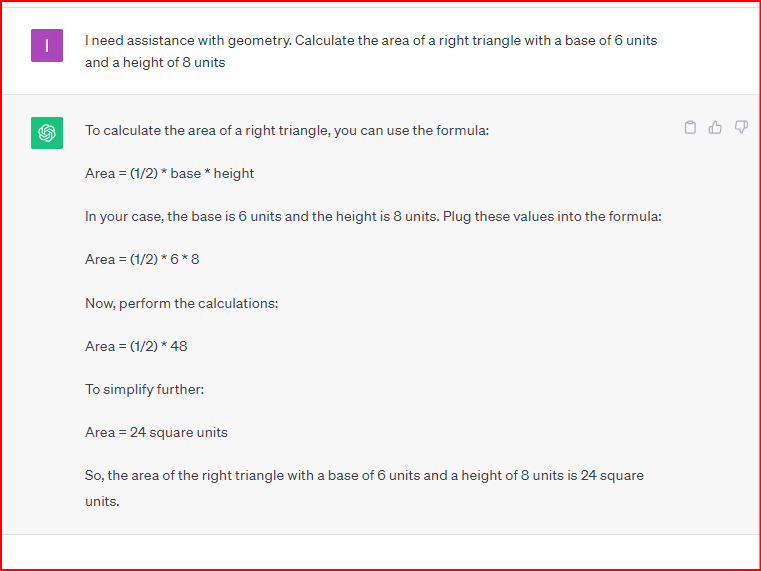

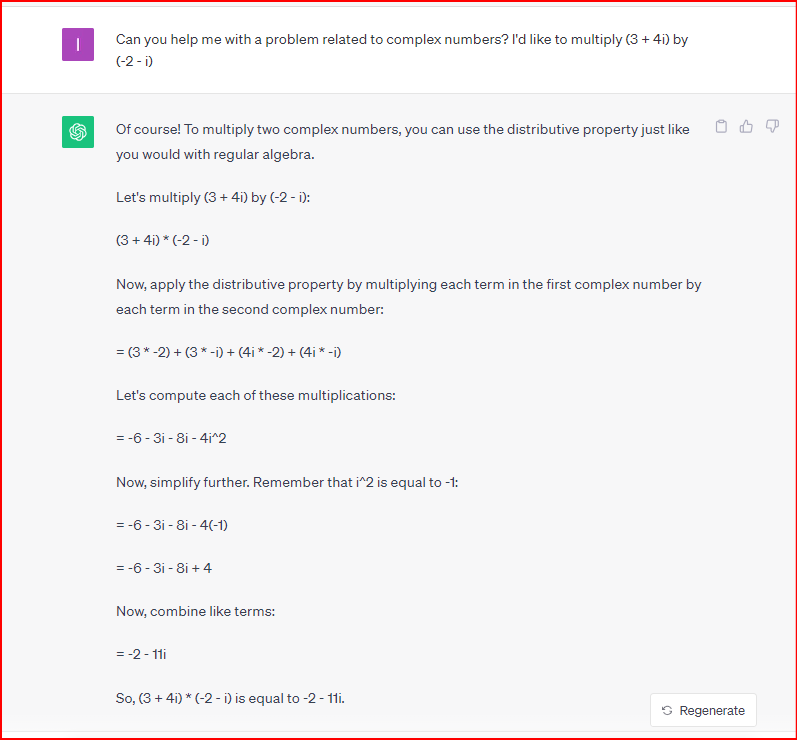